# WellnessAI (Iteration 0)

This notebook focuses on developing an AI model using the K-Nearest Neighbors (K-NN) algorithm to predict user's productivity, based on their daily habits and lifestyle factors. The model is built using a comprehensive dataset obtained from Kaggle, which captures various lifestyle parameters such as sleep quality, exercise, caffeine intake, screen time and work hours.

In [159]:
import sklearn
import pandas
import seaborn

print("scikit-learn version:", sklearn.__version__)     # 1.6.1
print("pandas version:", pandas.__version__)            # 2.2.3
print("seaborn version:", seaborn.__version__)          # 0.13.2

scikit-learn version: 1.6.1
pandas version: 2.2.3
seaborn version: 0.13.2


## 📦 Data provisioning
The dataset has been imported from Kaggle: https://www.kaggle.com/datasets/adilshamim8/sleep-cycle-and-productivity/data

In [160]:
df = pandas.read_csv("dataset/sleep_cycle_productivity.csv")
df.shape

(5000, 15)

## 📃 Sample the data

Display sample data to understand the dataset structure and identify key variables.

In [161]:
df.sample(10)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
3831,2024-01-19,4091,21,Male,21.42,4.87,7.46,4,40,197,178,6.259080,4,7,2
4117,2024-06-23,5179,45,Female,21.88,7.10,9.22,8,14,113,4,5.266889,5,3,3
3935,2024-03-08,6078,46,Female,23.60,7.78,8.18,10,52,87,126,5.956613,8,4,9
1059,2024-01-01,4037,55,Female,22.40,5.23,6.83,1,61,183,66,7.033695,8,1,8
2769,2024-03-02,1507,33,Other,20.85,5.63,8.78,4,77,59,74,4.823385,2,2,8
3213,2024-06-24,1068,38,Female,20.17,4.01,7.84,4,80,227,126,7.120301,10,3,5
4354,2024-07-14,8019,57,Male,21.83,5.95,8.12,8,35,276,26,7.444152,5,5,3
2528,2024-09-26,2884,28,Female,22.92,5.05,6.13,1,2,94,148,5.792536,6,3,8
772,2024-07-07,9711,57,Male,21.72,4.53,6.81,9,45,21,86,6.427626,7,3,6
35,2024-12-20,5968,47,Male,20.32,4.95,8.63,6,12,186,18,7.113613,9,3,9


Analyze Gender distribution for balance in the dataset.

In [162]:
group_info = df.groupby(["Gender"])["Gender"].count()
group_info

Gender
Female    1675
Male      1718
Other     1607
Name: Gender, dtype: int64

## 💡 Feature selection
Identifying features with significant impact on Productivity Score based on domain knowledge and initial observations.

In [163]:
features = ["Sleep Quality", "Exercise (mins/day)", "Screen Time Before Bed (mins)", "Caffeine Intake (mg)", "Stress Level", "Work Hours (hrs/day)"]
target = "Productivity Score"

X = df[features]
y = df[target]

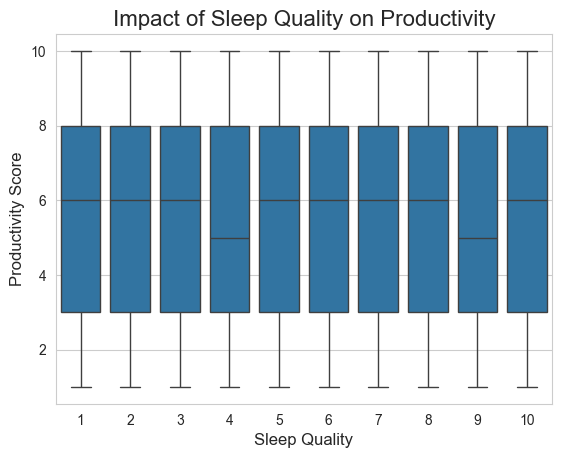

In [164]:
import matplotlib.pyplot as plt
seaborn.boxplot(data=df, x="Sleep Quality", y="Productivity Score")
plt.title("Impact of Sleep Quality on Productivity", fontsize=16)
plt.xlabel("Sleep Quality", fontsize=12)
plt.ylabel("Productivity Score", fontsize=12)
plt.show()

## 🪓 Splitting into train/test


In [165]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"There are in total {len(X)} observations, of which {len(X_train)} are now in the train set, and {len(X_test)} in the test set.")

There are in total 5000 observations, of which 4000 are now in the train set, and 1000 in the test set.


## ⚖️ Scaling
Scaling the data to ensure that all features contribute equally to the model.

In [166]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## 🧬 Modelling
Using the K-Nearest Neighbors (K-NN) algorithm.

In [167]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Experimenting with hyperparameter tuning (default value of `n_neighbors` is 5).
k_values = [3, 5, 7, 9]
for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    score = accuracy_score(y_test, pred)
    print(f"Accuracy with k={k}: {score:.3f}")

# Select the best value for `n_neighbors` (manual or automated tuning).
best_k = 7
model = KNeighborsClassifier(n_neighbors=best_k)
model.fit(X_train, y_train)
pred = model.predict(X_test)

Accuracy with k=3: 0.110
Accuracy with k=5: 0.103
Accuracy with k=7: 0.113
Accuracy with k=9: 0.098


## 🔬 Evaluation

In [168]:
accuracy = accuracy_score(y_test, pred)
print(f"Final Model Accuracy (k={best_k}): {accuracy:.3f}")
print("\nClassification Report:")
print(classification_report(y_test, pred))

Final Model Accuracy (k=7): 0.113

Classification Report:
              precision    recall  f1-score   support

           1       0.06      0.12      0.08        75
           2       0.15      0.21      0.17       109
           3       0.14      0.13      0.13        98
           4       0.14      0.14      0.14       103
           5       0.11      0.12      0.12        84
           6       0.11      0.10      0.10       108
           7       0.09      0.09      0.09        88
           8       0.14      0.08      0.10       122
           9       0.13      0.09      0.11       113
          10       0.09      0.05      0.06       100

    accuracy                           0.11      1000
   macro avg       0.11      0.11      0.11      1000
weighted avg       0.12      0.11      0.11      1000

